#    Install and Import Dependencies

In [2]:
from fbprophet import Prophet
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Read in Data and process Dates

In [3]:
df = pd.read_csv("aapl.csv")

In [4]:
df.head()

,timestamp,time,last_price
0,1617025815918,2021-03-29 09:50:16.188029-04:00,122.2910
1,1617025814325,2021-03-29 09:50:15.157702-04:00,122.2695
2,1617025814893,2021-03-29 09:50:15.923453-04:00,122.2700
3,1617025815411,2021-03-29 09:50:16.133392-04:00,122.3000
4,1617025816468,2021-03-29 09:50:16.613374-04:00,122.2750


In [20]:
df.describe()

,timestamp,last_price
count,5.736900e+04,57369.000000
mean,1.617208e+12,122.648583
std,9.604134e+07,0.743175
min,1.617026e+12,120.850000
25%,1.617201e+12,122.465000
50%,1.617216e+12,122.785000
75%,1.617290e+12,123.235000
max,1.617308e+12,124.165000


In [5]:
df.dtypes

timestamp       int64
time           object
last_price    float64
dtype: object

In [6]:
#COnverting to datetime so that I can do the group by column
df['time'] = pd.to_datetime(df['time'], utc=True)

In [7]:
df['time'] = df['time'].dt.tz_convert(None)

In [8]:
df.head()

,timestamp,time,last_price
0,1617025815918,2021-03-29 13:50:16.188029,122.2910
1,1617025814325,2021-03-29 13:50:15.157702,122.2695
2,1617025814893,2021-03-29 13:50:15.923453,122.2700
3,1617025815411,2021-03-29 13:50:16.133392,122.3000
4,1617025816468,2021-03-29 13:50:16.613374,122.2750


In [25]:
df.tail()

,timestamp,time,last_price
57364,1617307838351,2021-04-01 20:10:38.388392,122.9102
57365,1617307838867,2021-04-01 20:10:38.928002,122.9200
57366,1617307839402,2021-04-01 20:10:39.446546,122.9180
57367,1617307834111,2021-04-01 20:10:34.153363,122.8950
57368,1617307834657,2021-04-01 20:10:34.693589,122.9000


In [9]:
df.drop('timestamp',axis=1,inplace=True)

In [10]:
df.head()

,time,last_price
0,2021-03-29 13:50:16.188029,122.2910
1,2021-03-29 13:50:15.157702,122.2695
2,2021-03-29 13:50:15.923453,122.2700
3,2021-03-29 13:50:16.133392,122.3000
4,2021-03-29 13:50:16.613374,122.2750


In [11]:
df.columns=['ds', 'y']

In [12]:
df.head()

,ds,y
0,2021-03-29 13:50:16.188029,122.2910
1,2021-03-29 13:50:15.157702,122.2695
2,2021-03-29 13:50:15.923453,122.2700
3,2021-03-29 13:50:16.133392,122.3000
4,2021-03-29 13:50:16.613374,122.2750


In [13]:
df.shape

(57369, 2)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

<Figure size 1152x432 with 0 Axes>

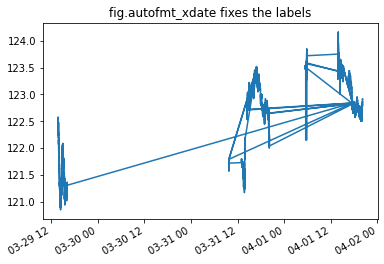

In [38]:
plt.figure(figsize=(16,6))
fig,ax = plt.subplots()
# formatter=MyFormatter(df['ds'])
# ax.plot(r.date, r.close)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# fig.
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('fig.autofmt_xdate fixes the labels')
# plt.plot(df.set_index(['ds']))
plt.plot(df.ds,df.y)
# plt.autofmt_xdate()
# ax.xaxis.set_major_formatter(formatter)

#    Train Model

In [28]:
# m = Prophet(changepoint_prior_scale=0.02)
m = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=55
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)
# model=m.fit(aapl)
# model.fit(aapl)
model=m.fit(df)

# Forecast Away

In [29]:
future = m.make_future_dataframe(periods=200, freq='1min')

In [30]:
future.head()

,ds
0,2021-03-29 13:50:15.157702
1,2021-03-29 13:50:15.923453
2,2021-03-29 13:50:16.133392
3,2021-03-29 13:50:16.188029
4,2021-03-29 13:50:16.613374


In [31]:
future.tail()

,ds
57564,2021-04-01 23:26:39.446546
57565,2021-04-01 23:27:39.446546
57566,2021-04-01 23:28:39.446546
57567,2021-04-01 23:29:39.446546
57568,2021-04-01 23:30:39.446546


In [32]:
fcst = m.predict(future)

In [33]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-29 13:50:15.157702,122.875651,122.458390,122.784249,122.875651,122.875651,-0.256875,-0.256875,-0.256875,4.628292,...,-11.943809,-11.943809,-11.943809,12.466031,12.466031,12.466031,0.0,0.0,0.0,122.618776
1,2021-03-29 13:50:15.923453,122.875651,122.440635,122.772354,122.875651,122.875651,-0.257997,-0.257997,-0.257997,4.628538,...,-11.941804,-11.941804,-11.941804,12.466021,12.466021,12.466021,0.0,0.0,0.0,122.617654
2,2021-03-29 13:50:16.133392,122.875652,122.452208,122.787032,122.875652,122.875652,-0.258305,-0.258305,-0.258305,4.628605,...,-11.941254,-11.941254,-11.941254,12.466019,12.466019,12.466019,0.0,0.0,0.0,122.617347
3,2021-03-29 13:50:16.188029,122.875652,122.447550,122.806923,122.875652,122.875652,-0.258385,-0.258385,-0.258385,4.628623,...,-11.941111,-11.941111,-11.941111,12.466018,12.466018,12.466018,0.0,0.0,0.0,122.617267
4,2021-03-29 13:50:16.613374,122.875652,122.442196,122.799028,122.875652,122.875652,-0.259008,-0.259008,-0.259008,4.628759,...,-11.939997,-11.939997,-11.939997,12.466012,12.466012,12.466012,0.0,0.0,0.0,122.616644


In [34]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57564,2021-04-01 23:26:39.446546,114.121908,113.892446,114.350549
57565,2021-04-01 23:27:39.446546,114.962424,114.741441,115.180020
57566,2021-04-01 23:28:39.446546,115.817533,115.605581,116.020650
57567,2021-04-01 23:29:39.446546,116.685145,116.461762,116.897629
57568,2021-04-01 23:30:39.446546,117.563130,117.364262,117.780396


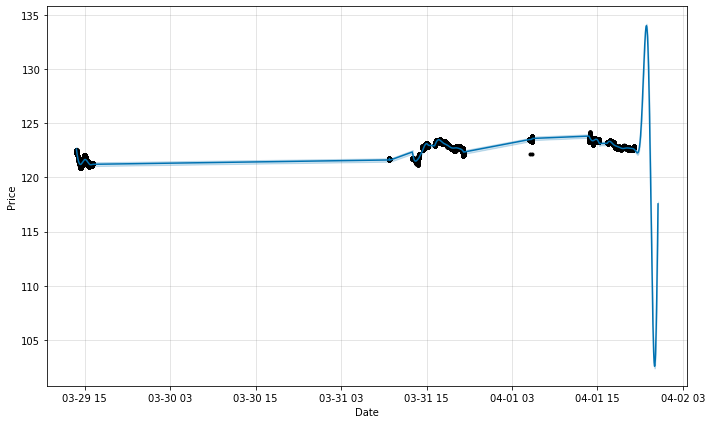

In [39]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(fcst,xlabel='Date',ylabel='Price')
# a = add_changepoints_to_plot(fig.gca(), m, fcst)

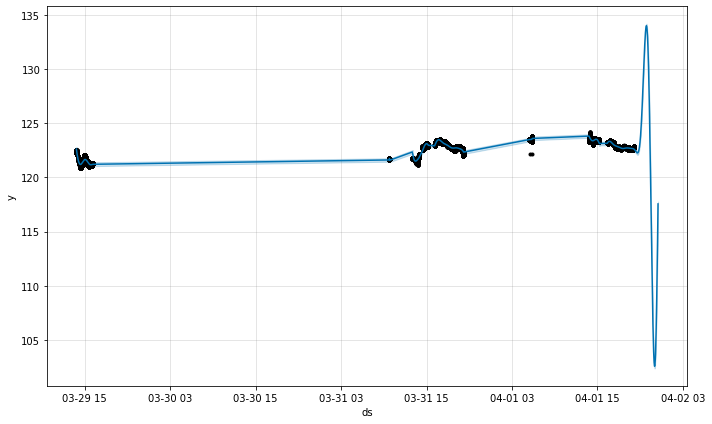

In [36]:
fig = m.plot(fcst)

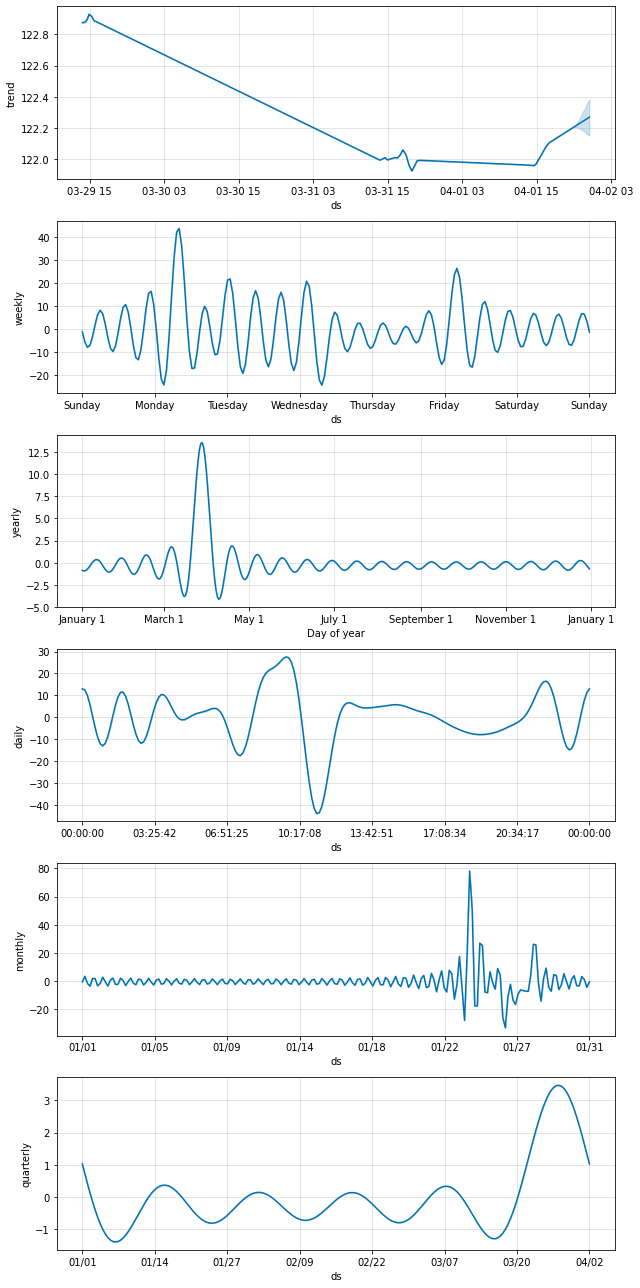

In [37]:
fig = m.plot_components(fcst)